In [ ]:
library(tidyverse)
library(data.table)
library(plotly) # for interactive ploting
library(DT) # for interactive tabulation
library(lubridate) # for date processing
library(broom) # for tidy statistical summaries

In [ ]:
options(repr.matrix.max.rows=20, repr.matrix.max.cols=15) # for limiting the number of top and bottom rows of tables printed 

In [ ]:
datapath <- "~/data_ad454"

# Visualizing the Realty Dataset

Let's first import the realty dataset:

In [ ]:
realty_data <- readRDS(sprintf("%s/rds/02_01_realty_data.rds", datapath))

Please follow the steps:

- Select price, brut_metrekare, bina_yasi, krediye_uygunluk columns
- Create a new column unit_price by dividing price to brut_metrekare (you may use mutate function)
- Filter the dataset so that top and bottom 5% unit_price values are trimmed off. You may use filter, between and quantile functions. So only those rows with unit_price values between 0.05 and 0.95 quantiles are filtered
- Create a scatter plot with ggplot and geom_point where x axis is bina_yasi, y axis is unit_price, and the points are differentiated in color across krediye_uygunluk as such (no need for plotly):

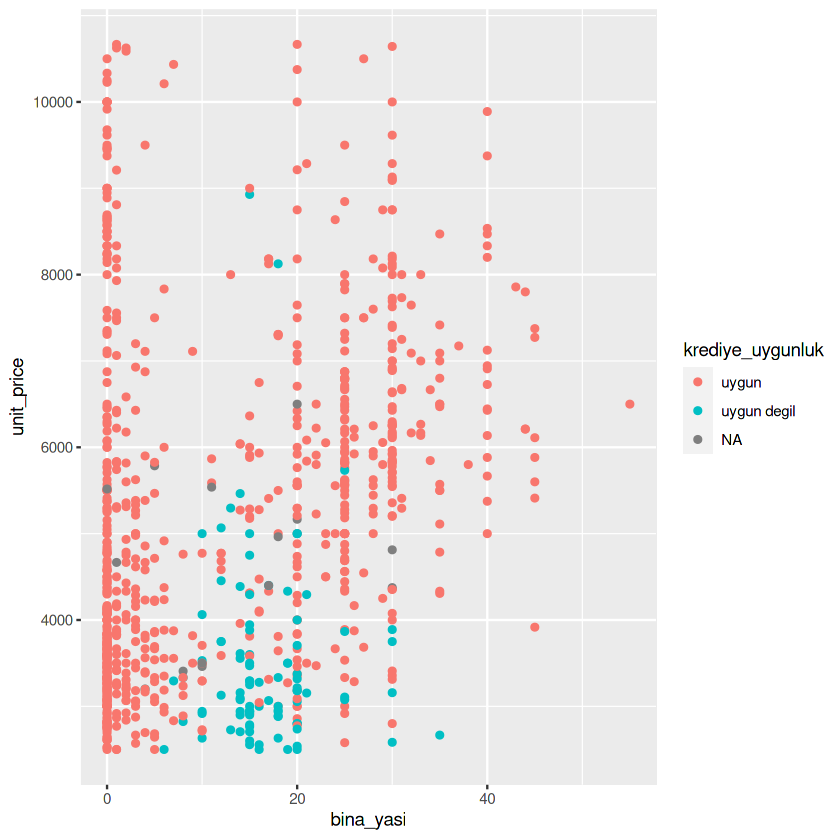

## Answer

In [ ]:
features <- c("price", "brut_metrekare",
             "bina_yasi", "krediye_uygunluk")

In [ ]:
realty_data2 <- realty_data %>%
select(all_of(features)) %>%
mutate(unit_price = price / brut_metrekare) %>%
filter(between(unit_price, quantile(unit_price, 0.05), quantile(unit_price, 0.95)))

In [ ]:
realty_data2 %>% ggplot(aes(x = bina_yasi,
                           y = unit_price,
                           color = krediye_uygunluk)) +
                        geom_point() # add the scatter plot